This is the Page View Time Series Visualizer project. Using Pandas, Matplotlib, and Seaborn we had to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations would help us understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

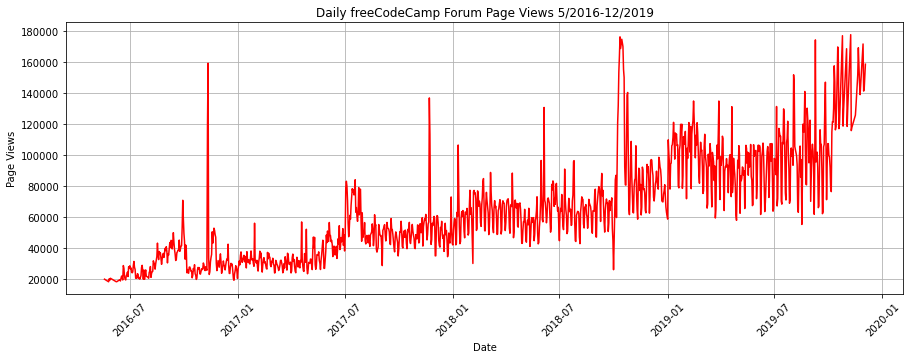

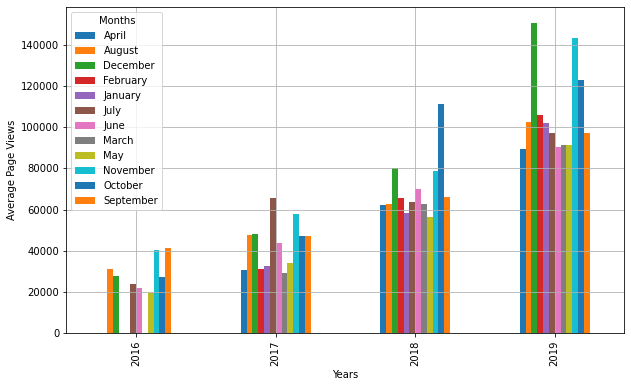

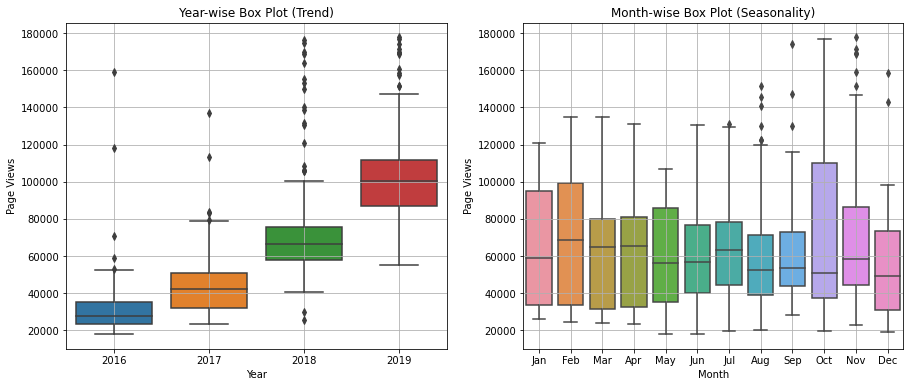

In [7]:

def draw_line_plot():
    df_line = df.copy()

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_line.index, df_line["value"], color="r")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.grid(True)
    plt.xticks(rotation=45)

    plt.savefig("line_plot.png")
    plt.show()


def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.strftime("%B")

    df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    fig, ax = plt.subplots(figsize=(10, 6))
    df_bar.plot(kind="bar", ax=ax)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months")
    ax.set_xticklabels(df_bar.index, rotation=90)
    ax.grid(True)

    plt.savefig("bar_plot.png")
    plt.show()


def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.boxplot(x="year", y="value", data=df_box, ax=ax[0])
    sns.boxplot(x="month", y="value", data=df_box, ax=ax[1], order=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])

    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    ax[0].grid(True)

    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
    ax[1].grid(True)

    plt.savefig("box_plot.png")
    plt.show()


# Load and preprocess the data
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

# Call the plotting functions
draw_line_plot()
draw_bar_plot()
draw_box_plot()
